<a href="https://colab.research.google.com/github/jainsakku/3D-path-Plotter/blob/master/rnn_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from __future__ import absolute_import, division, print_function, unicode_literals

!pip install -q tensorflow-gpu==2.0.0-alpha0
import tensorflow_datasets as tfds
import tensorflow as tf



In [0]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()


In [0]:
dataset, info = tfds.load('imdb_reviews/subwords8k', with_info=True,
                          as_supervised=True)
train_dataset, test_dataset = dataset['train'], dataset['test']


In [36]:
print(info.features)

FeaturesDict({'text': Text(shape=(None,), dtype=tf.int64, encoder=<SubwordTextEncoder vocab_size=8185>), 'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=2)})


In [0]:
tokenizer = info.features['text'].encoder


In [46]:
print ('Vocabulary size: {}'.format(tokenizer.vocab_size))


Vocabulary size: 8185


In [47]:
sample_string = 'TensorFlow is cool.'

tokenized_string = tokenizer.encode(sample_string)
print ('Tokenized string is {}'.format(tokenized_string))

original_string = tokenizer.decode(tokenized_string)
print ('The original string: {}'.format(original_string))

assert original_string == sample_string


Tokenized string is [6307, 2327, 4043, 4265, 9, 2724, 7975]
The original string: TensorFlow is cool.


In [48]:
for ts in tokenized_string:
  print ('{} ----> {}'.format(ts, tokenizer.decode([ts])))


6307 ----> Ten
2327 ----> sor
4043 ----> Fl
4265 ----> ow 
9 ----> is 
2724 ----> cool
7975 ----> .


In [0]:
BUFFER_SIZE = 10000
BATCH_SIZE = 64


In [0]:
train_dataset = train_dataset.shuffle(BUFFER_SIZE)
train_dataset = train_dataset.padded_batch(BATCH_SIZE, train_dataset.output_shapes)

test_dataset = test_dataset.padded_batch(BATCH_SIZE, test_dataset.output_shapes)


In [51]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(tokenizer.vocab_size, 64),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])


W0502 14:46:31.791905 140261006768000 tf_logging.py:161] <tensorflow.python.keras.layers.recurrent.UnifiedLSTM object at 0x7f909844f9b0>: Note that this layer is not optimized for performance. Please use tf.keras.layers.CuDNNLSTM for better performance on GPU.
W0502 14:46:31.796444 140261006768000 tf_logging.py:161] <tensorflow.python.keras.layers.recurrent.UnifiedLSTM object at 0x7f909aa34630>: Note that this layer is not optimized for performance. Please use tf.keras.layers.CuDNNLSTM for better performance on GPU.


In [0]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])


In [0]:
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import EarlyStopping
stop = EarlyStopping(monitor='val_loss', patience=15, verbose=1, mode='min')
save = ModelCheckpoint('./my_model.hdf5', save_best_only=True, monitor='val_loss', mode='min')



In [53]:
history = model.fit(train_dataset, epochs=5,
                    validation_data=test_dataset)


Epoch 1/5
391/391 [==============================] - 155s 398ms/step - loss: 0.5295 - accuracy: 0.7299 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 2/5
391/391 [==============================] - 152s 389ms/step - loss: 0.3748 - accuracy: 0.8456 - val_loss: 0.5081 - val_accuracy: 0.8214
Epoch 3/5
391/391 [==============================] - 153s 391ms/step - loss: 0.3134 - accuracy: 0.8772 - val_loss: 0.4523 - val_accuracy: 0.8166
Epoch 4/5
391/391 [==============================] - 150s 385ms/step - loss: 0.2705 - accuracy: 0.8966 - val_loss: 0.4089 - val_accuracy: 0.8372
Epoch 5/5
391/391 [==============================] - 153s 390ms/step - loss: 0.2146 - accuracy: 0.9174 - val_loss: 0.4528 - val_accuracy: 0.8398


In [54]:
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model.h5")
print("Saved model to disk")

Saved model to disk


In [55]:
test_loss, test_acc = model.evaluate(test_dataset)

print('Test Loss: {}'.format(test_loss))
print('Test Accuracy: {}'.format(test_acc))


    391/Unknown - 44s 111ms/step - loss: 0.4528 - accuracy: 0.8398Test Loss: 0.4527602736907237
Test Accuracy: 0.8398399949073792


In [0]:
def sample_predict(sentence, pad):
  tokenized_sample_pred_text = tokenizer.encode(sample_pred_text)

  if pad:
    tokenized_sample_pred_text = pad_to_size(tokenized_sample_pred_text, 64)

  predictions = model.predict(tf.expand_dims(tokenized_sample_pred_text, 0))

  return (predictions)


In [58]:
sample_pred_text = ('Excellent very good')
predictions = sample_predict(sample_pred_text, pad=False)
print (predictions)


[[0.9437852]]


In [60]:
sample_pred_text = ('Not good bad very bad extremem bad ')
predictions = sample_predict(sample_pred_text, pad=False)
print (predictions)

[[0.03297373]]


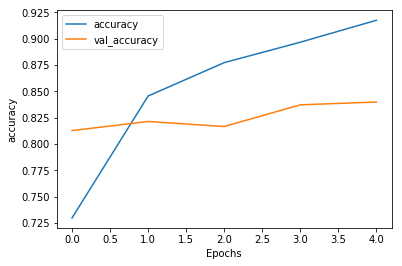

In [61]:
plot_graphs(history, 'accuracy')


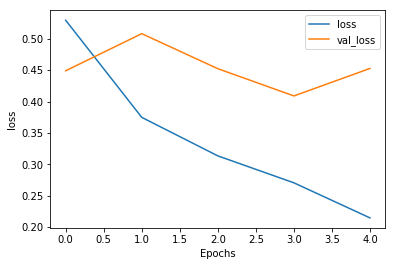

In [62]:
plot_graphs(history, 'loss')


In [63]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(tokenizer.vocab_size, 64),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(
        64, return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])


W0502 15:08:05.675755 140261006768000 tf_logging.py:161] <tensorflow.python.keras.layers.recurrent.UnifiedLSTM object at 0x7f909cc9a240>: Note that this layer is not optimized for performance. Please use tf.keras.layers.CuDNNLSTM for better performance on GPU.
W0502 15:08:05.684742 140261006768000 tf_logging.py:161] <tensorflow.python.keras.layers.recurrent.UnifiedLSTM object at 0x7f909cce3828>: Note that this layer is not optimized for performance. Please use tf.keras.layers.CuDNNLSTM for better performance on GPU.
W0502 15:08:05.692217 140261006768000 tf_logging.py:161] <tensorflow.python.keras.layers.recurrent.UnifiedLSTM object at 0x7f909cd0a6d8>: Note that this layer is not optimized for performance. Please use tf.keras.layers.CuDNNLSTM for better performance on GPU.
W0502 15:08:05.700229 140261006768000 tf_logging.py:161] <tensorflow.python.keras.layers.recurrent.UnifiedLSTM object at 0x7f909cd129e8>: Note that this layer is not optimized for performance. Please use tf.keras.laye

In [0]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])


In [65]:
history = model.fit(train_dataset, epochs=5,
                    validation_data=test_dataset)


Epoch 1/5
391/391 [==============================] - 286s 731ms/step - loss: 0.5537 - accuracy: 0.7185 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 2/5
391/391 [==============================] - 283s 724ms/step - loss: 0.4301 - accuracy: 0.8154 - val_loss: 0.4397 - val_accuracy: 0.8083
Epoch 3/5
391/391 [==============================] - 283s 724ms/step - loss: 0.3651 - accuracy: 0.8472 - val_loss: 0.4188 - val_accuracy: 0.8236
Epoch 4/5
391/391 [==============================] - 281s 718ms/step - loss: 0.3011 - accuracy: 0.8814 - val_loss: 0.4506 - val_accuracy: 0.8154
Epoch 5/5
391/391 [==============================] - 282s 722ms/step - loss: 0.2633 - accuracy: 0.8990 - val_loss: 0.4760 - val_accuracy: 0.8102


In [66]:
print(model)

In [67]:
test_loss, test_acc = model.evaluate(test_dataset)

print('Test Loss: {}'.format(test_loss))
print('Test Accuracy: {}'.format(test_acc))


    391/Unknown - 80s 205ms/step - loss: 0.4760 - accuracy: 0.8102Test Loss: 0.4760068229321019
Test Accuracy: 0.8101599812507629


In [68]:
sample_pred_text = ('Excellent very good')
predictions = sample_predict(sample_pred_text, pad=False)
print (predictions)


[[0.9353287]]


In [69]:
sample_pred_text = ('Not good bad very bad extremem bad')
predictions = sample_predict(sample_pred_text, pad=False)
print (predictions)


[[0.02372717]]


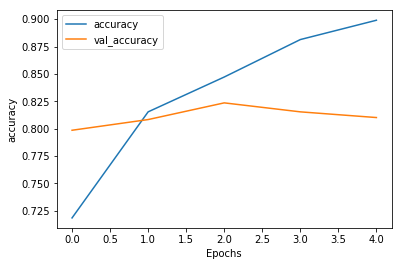

In [70]:
plot_graphs(history, 'accuracy')


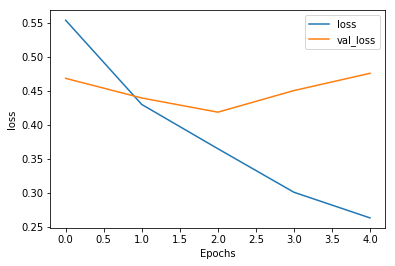

In [71]:
plot_graphs(history, 'loss')


In [72]:
model_json = model.to_json()
with open("model1.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model1.h5")
print("Saved model to disk")

Saved model to disk
